# <span style="color:red"><b>TOURNE SUR PC</b></span>
# Composing Layers & Subclassing

## What you'll learn in this class 🧐🧐

One last thing to see to be a deep learning expert on Tensorflow 2.0 is how to make layers by hand. This is done by a principle of Object Oriented Programming which is to create subclasses that inherit from a parent class. 

This will allow you to set up even the most complex Deep Learning models such as GANs (Generative Adversarial Models). 

In [6]:
import tensorflow as tf

## Subclassing 

To understand how to make Tensorflow layers it is useful to spend some time understanding the concept of subclasses. The principle is simple, a subclass is a class that inherits the attributes of a parent class. 

For the demonstration, we will use this excellent article from [Julian](https://pybit.es/author/julian.html) on [Pybite](https://pybit.es/python-subclasses.html). 

Imagine you have a Boss class, which describes a generic boss. Having experience in the working world, you know that there are GoodBosses and BadBosses. In terms of code, we come to the following thing: 

* **Relative Class**: Boss
* **Sub-Class** : GoodBoss & BadBoss

Each of the subclasses will inherit the generic Boss attributes, to which we can add other attributes specific to GoodBoss & BadBoss 

Let's see what it does in code: 

In [7]:
# This is the Boss class. This one contains the attributes [name, attitude, behaviour, face]
# and the methods get_attitude, get_behaviour, get_face which will return each of the attributes

class Boss(object):
    def __init__(self, name, attitude, behaviour, face):
        self.name       = name
        self.attitude   = attitude
        self.behaviour  = behaviour
        self.face       = face

    def get_attitude(self):
        return self.attitude

    def get_behaviour(self):
        return self.behaviour

    def get_face(self):
        return self.face
      
boss = Boss("Julian", "Positive", "Social", "Smiling")
boss.get_attitude()

'Positive'

In [8]:
boss.attitude

'Positive'

In [9]:
# Now let's create two classes, GoodBoss & BadBoss that will inherit from Boss

class GoodBoss(Boss):
    def __init__(self, name, attitude, behaviour, face, experience):
        super().__init__(name, attitude, behaviour, face)              # ! PAS OUBLIER !!!!!!!!!!!!!!!!!!!
        self.experience = experience 
        
    def nurture_talent(self):
      #A good boss nurtures talent making employees happy!
      return "The employees feel all warm and fuzzy then put their talents to good use."

    def encourage(self):
      #A good boss encourages their employees!
      return "The team cheers, starts shouting awesome slogans then gets back to work."
        
michel = GoodBoss("Michel", "Positive", "Funny", "Happy", 5) #appelle la fonction __init__

print("{}'s Behaviour: {}\nHow does {} nurtures talents: {}".format(michel.name,
                                                                     michel.get_behaviour(),
                                                                     michel.name,
                                                                     michel.nurture_talent()))

class BadBoss(Boss):
    def __init__(self, name, attitude, behaviour, face):
        super().__init__(name, attitude, behaviour, face)
        
    def hoard_praise(self):
      return "The employees feel cheated and start plotting Bob's demise while he stares at his own reflection."

    def yell(self):
      return "Everyone stares while {} yells.".format(self.name)
   

bob = BadBoss("Bob", "Crazy", "Anti-Social", "Scowl of Hate")
print(bob.yell())

Michel's Behaviour: Funny
How does Michel nurtures talents: The employees feel all warm and fuzzy then put their talents to good use.
Everyone stares while Bob yells.


Here we created the _GoodBoss_ class, in which we added the `experience' attribute that corresponds to the number of years of experience and we inherited the attributes from _Boss_. We also added two `nurture_talent()` & `encourage()` methods which are specific to GoodBoss. 

We did the same with the _BadBoss_ class, in which we did not add new attributes, but added methods specific to _BadBoss_: `yell()` & `hoard_praises()`.

#### Super()


There is, however, something new which is this *super.__init__()*. This is a concept that is not necessarily easy to understand at first. The principle is actually only useful when you need to inherit your subclass from several parent classes. You can look at this [Stack Overflow answer](https://stackoverflow.com/questions/576169/understanding-python-super-with-init-methods) for more details. 

The important thing to remember, however, is to use this method in addition to your *__init__()* of your subclass to make sure your inheritance goes smoothly. 

## Compose Layers 

Now let's look at the concept of _layer composition_. This expression sounds scary, however, you've already done it as soon as you've created a neural network. This is what layer-building with Keras is all about:

In [10]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1), input_shape=(None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])

my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

This is a _diaper composition_. Here we have initialized a simple convolutional neural network in which we have added layers Conv2D, BatchNormalization etc. 

In all the _classical_ cases of Deep Learning, this will be more than enough to create robust models. Tensorflow developers [strongly recommend using this type of syntax](https://www.tensorflow.org/beta/tutorials/eager/custom_layers) as often as possible as it is easier to understand. 

However, if you want to implement more complex models, you will need to create custom compound layers. The principle, however, is not that complicated. You will create a subclass that will inherit from the parent class _keras.Model_. You can then create your layers as you wish. 

Let's see how we can rewrite the above sequence by creating a subclass of _keras.Model_.

In [11]:
# import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [12]:
class ResnetIdentityBlock(tf.keras.Model):
  
  def __init__(self, kernel_size, filters):
    super().__init__()
    
    filter1, filter2, filter3 = filters # filters = interable (filter1,filter2,filter3), [filter1,filter2,filter3]
    
    # On instancie les couches
    # Pas de cablage juste de l'intaciation
    self.conv2a = tf.keras.layers.Conv2D(filters = filter1,kernel_size= kernel_size, padding="same")
    self.bn2a = tf.keras.layers.BatchNormalization()
    
    self.conv2b = tf.keras.layers.Conv2D(filter2, kernel_size, padding="same")
    self.bn2b = tf.keras.layers.BatchNormalization()
    
    self.conv2c = tf.keras.layers.Conv2D(filter3, kernel_size, padding="same")
    self.bn2c = tf.keras.layers.BatchNormalization()
    


  def call(self, input_tensor, training=False):                   # ! *************** 
                                                                  # Nous c'est là qu'on va faire le cablage
    x = self.conv2a(input_tensor)
    x = self.bn2a(x, training=training)
    x = tf.nn.relu(x)
    
    x = self.conv2b(x)
    x = self.bn2b(x, training=training)
    x = tf.nn.relu(x)
    
    x = self.conv2c(x)
    x = self.bn2c(x, training=training)
    x = tf.nn.relu(x)
    
    x += input_tensor
    
    return x
    

block = ResnetIdentityBlock(2, [1,2,3])
block(tf.zeros([1, 2, 3, 3]))               # C'est call qui est invoqué. Permet 

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [13]:
# On fait 10 blocks avec 3 layers

model_ = tf.keras.Sequential([ResnetIdentityBlock(2, [1,2,3]) for i in range(10)])

In [14]:
model_(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

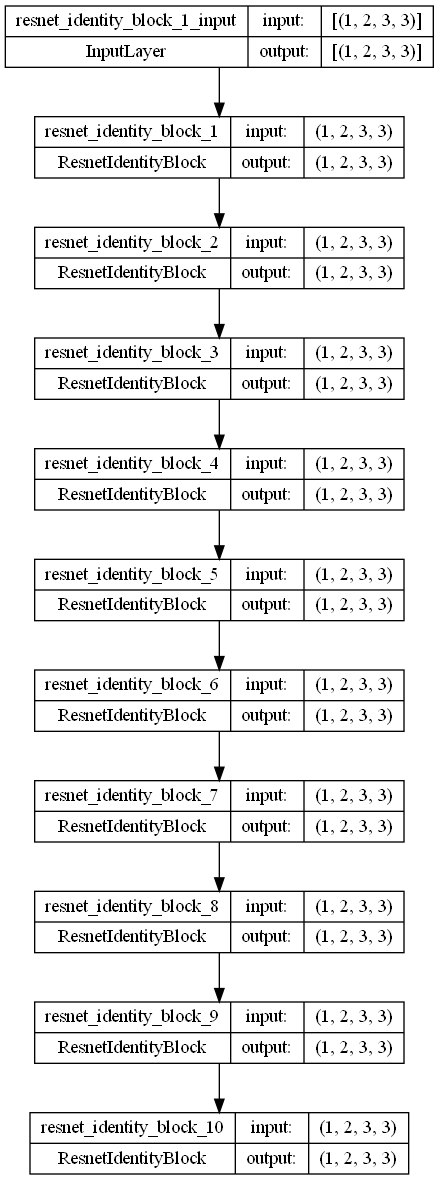

In [15]:
tf.keras.utils.plot_model(model_, show_shapes=True)

So this is an exact copy of our sequential model of Keras. The structure of your subclass will very often follow this exact structure: 

* *__init__()* : Whose purpose is to initialize your layers and inherit _keras.Model_
* *call()* : The purpose of this is to implement your _forward pass_, i.e. how your model will perform the operations from the first layer to the last one. 

So you can see that there is more flexibility to inherit from _keras.Model_ since you will be able to manipulate your _forward pass_ exactly the way you want! 

## Resources 📚📚

* [Python Subclasses](https://pybit.es/python-subclasses.html)
* [Custom Layers](rg/beta/tutorials/eager/custom_layers)
* [Understand Python super() with __init__() methods](https://stackoverflow.com/questions/576169/understanding-python-super-with-init-methods)